In [6]:
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import catboost as ctb

In [7]:
df = pd.read_csv('treino.csv')
df_test = pd.read_csv('teste.csv')

In [8]:
df.info()
# there are no null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      8000 non-null   float64
 1   f1      8000 non-null   float64
 2   f2      8000 non-null   float64
 3   f3      8000 non-null   float64
 4   f4      8000 non-null   float64
 5   f5      8000 non-null   float64
 6   f6      8000 non-null   float64
 7   f7      8000 non-null   float64
 8   f8      8000 non-null   float64
 9   f9      8000 non-null   float64
 10  f10     8000 non-null   float64
 11  f11     8000 non-null   float64
 12  f12     8000 non-null   float64
 13  f13     8000 non-null   float64
 14  f14     8000 non-null   float64
 15  f15     8000 non-null   float64
 16  f16     8000 non-null   float64
 17  f17     8000 non-null   float64
 18  f18     8000 non-null   float64
 19  f19     8000 non-null   float64
 20  f20     8000 non-null   float64
 21  f21     8000 non-null   float64
 22  

<Axes: >

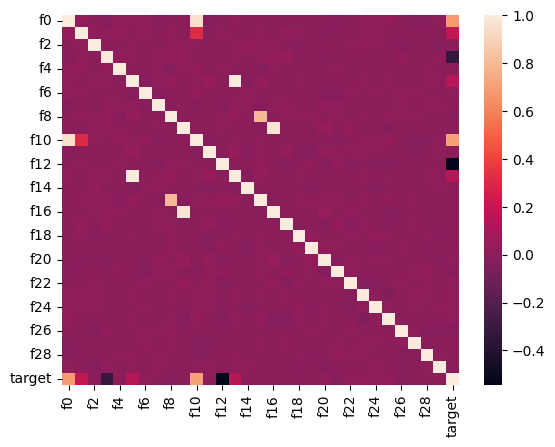

In [100]:
sns.heatmap(df.corr())

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


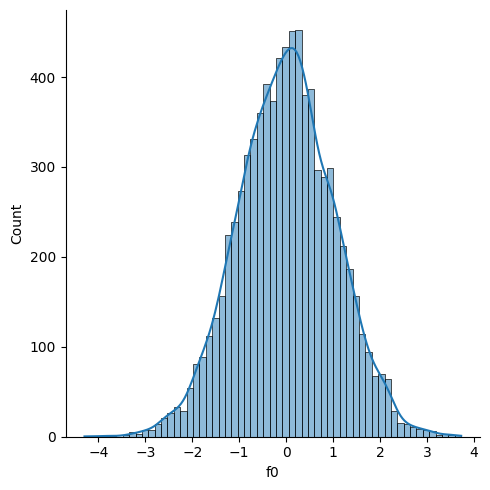

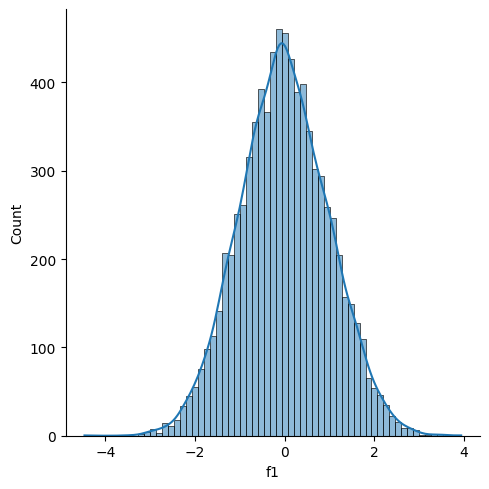

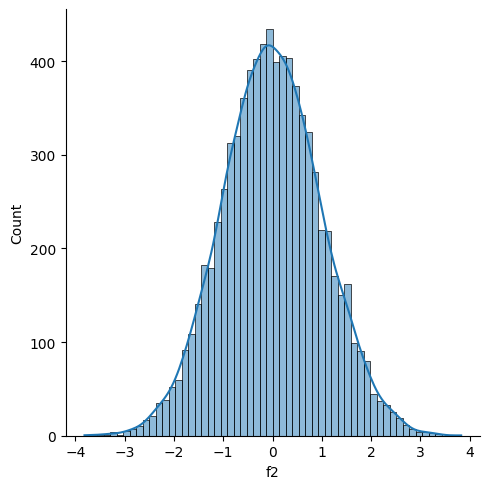

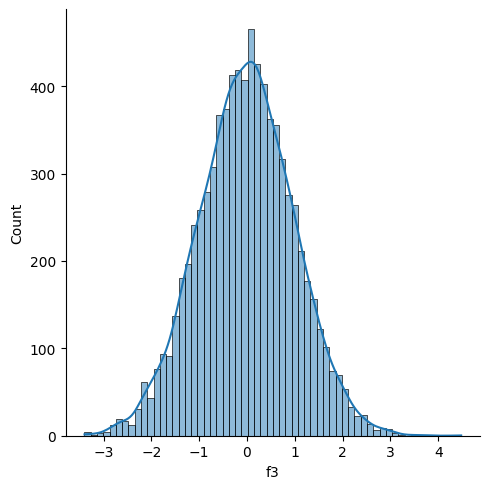

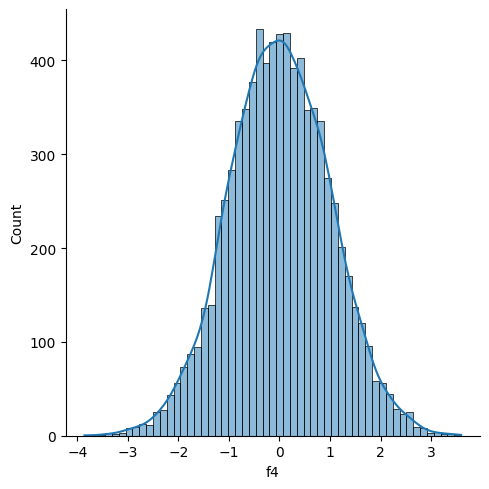

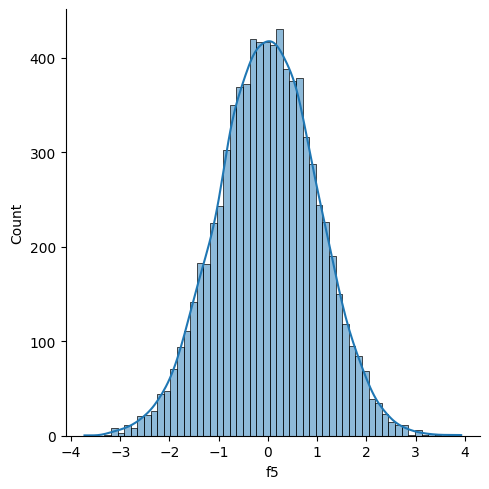

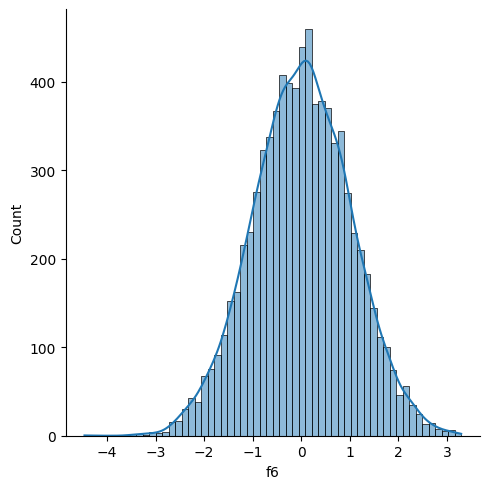

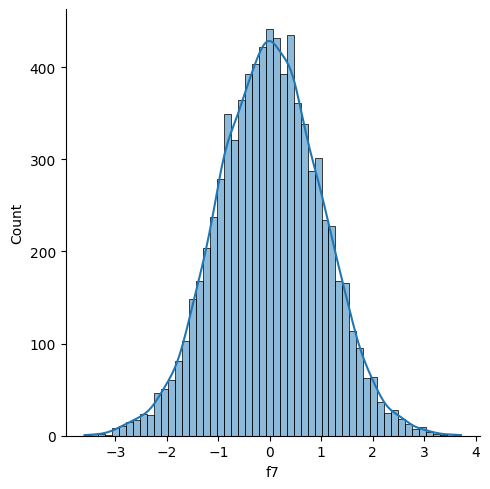

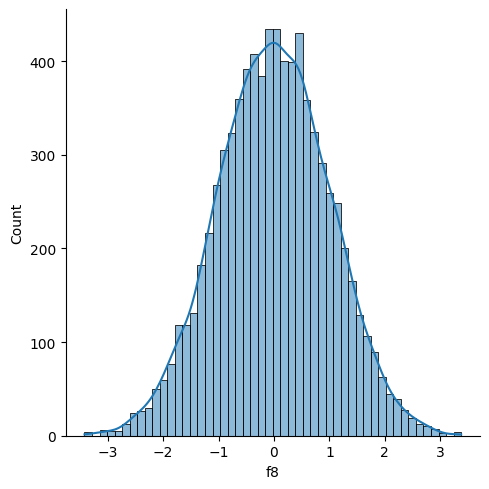

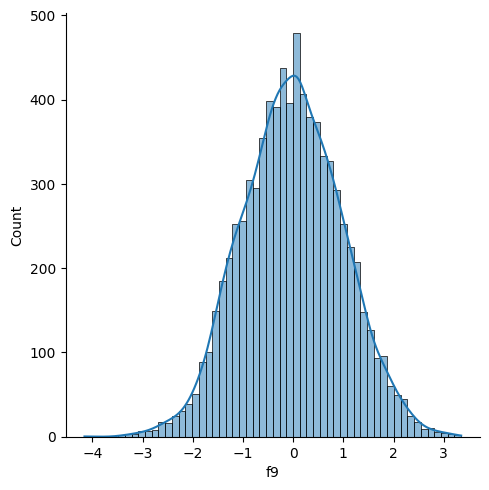

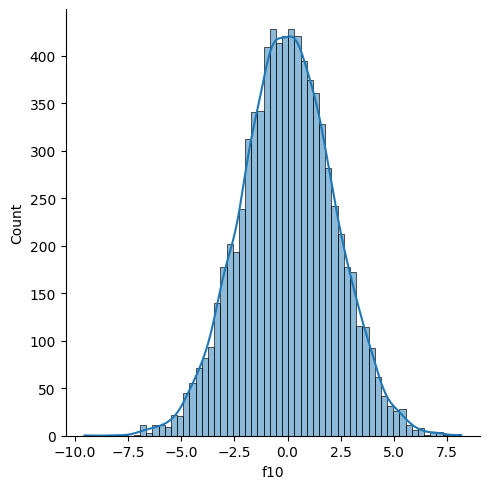

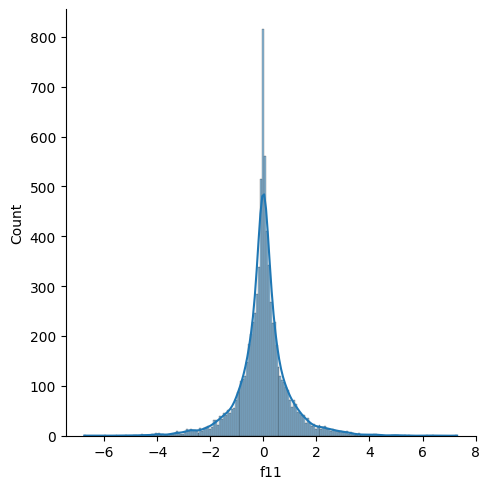

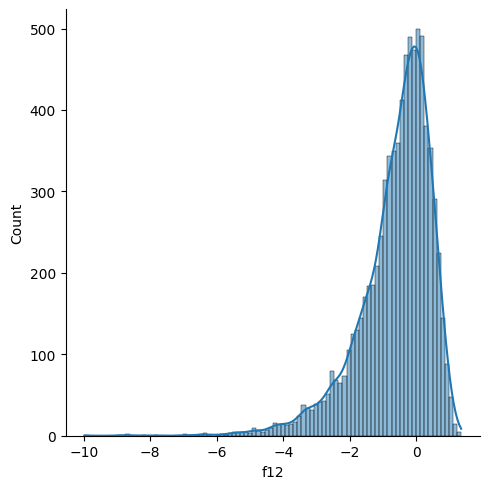

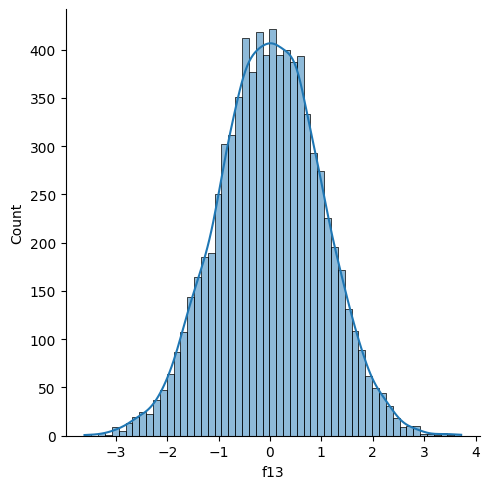

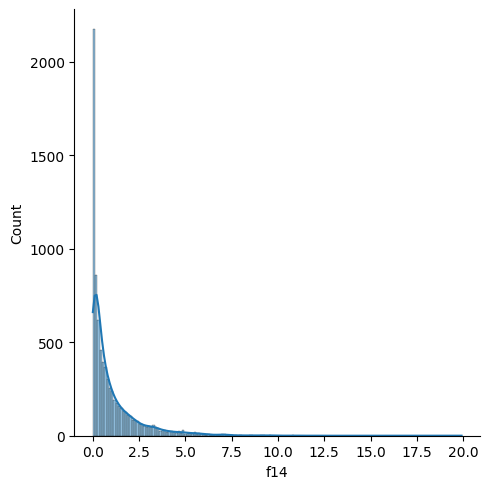

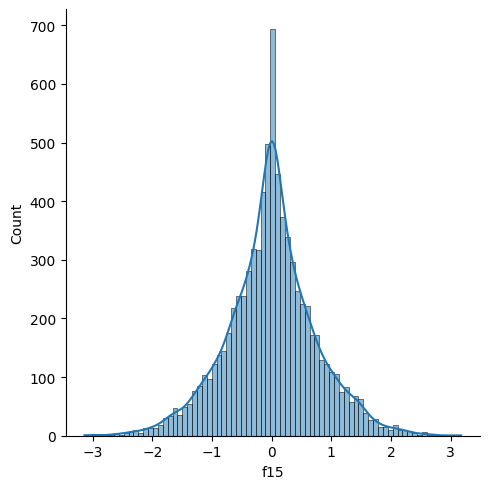

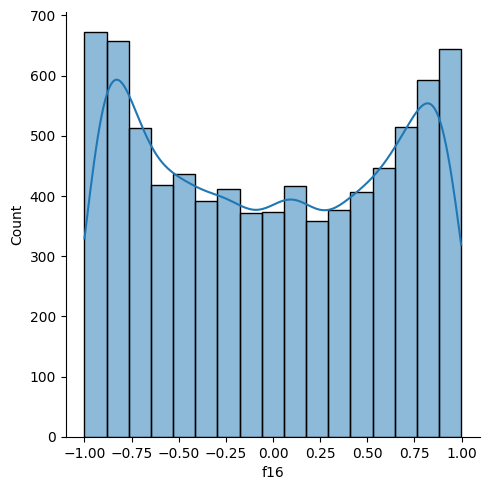

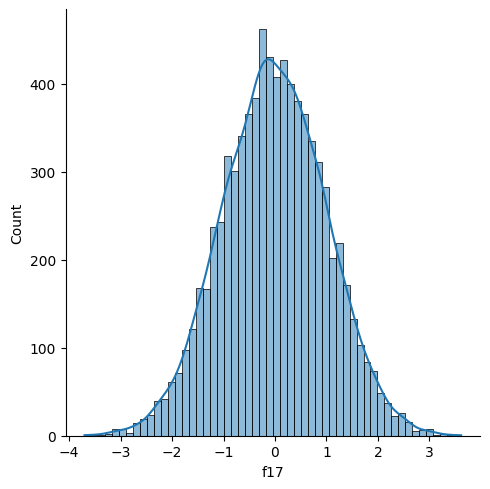

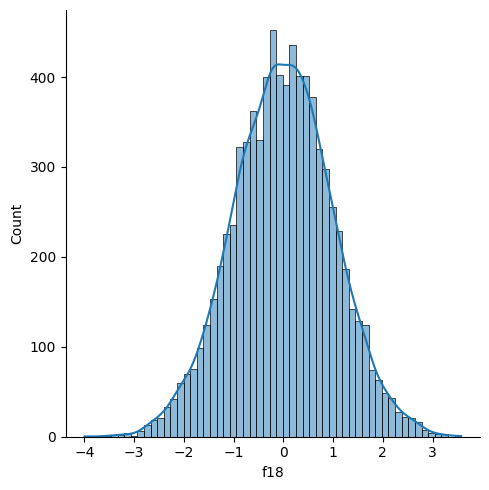

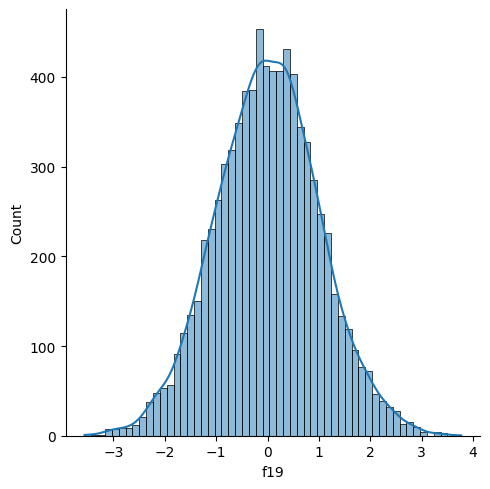

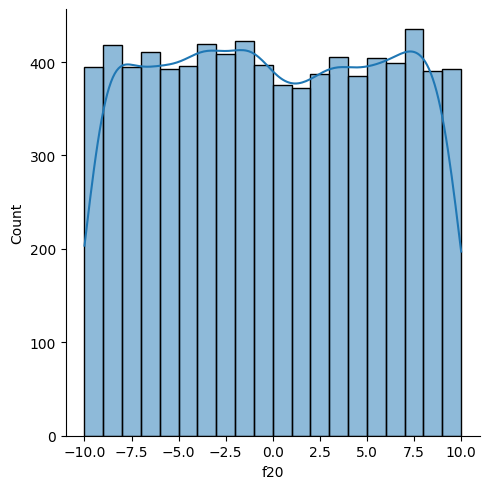

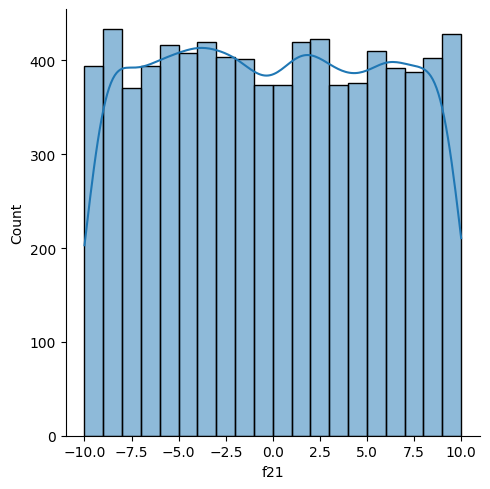

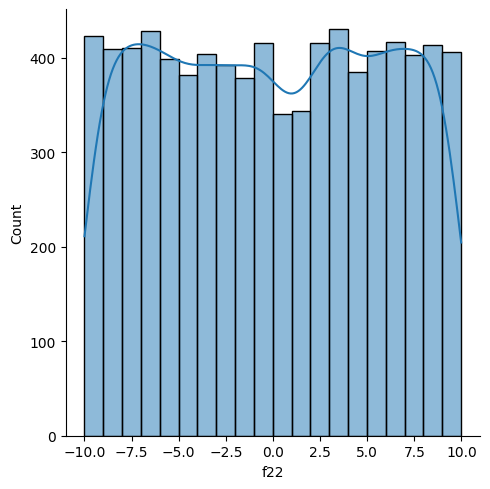

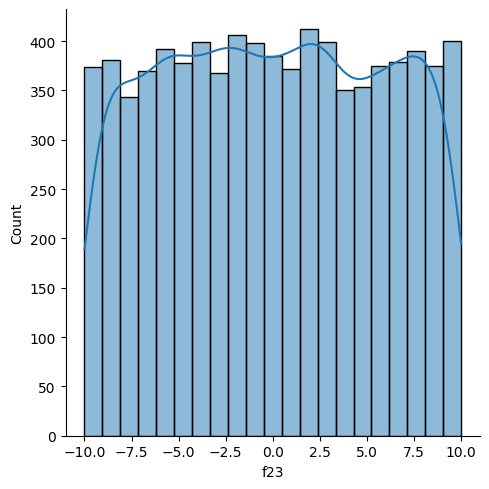

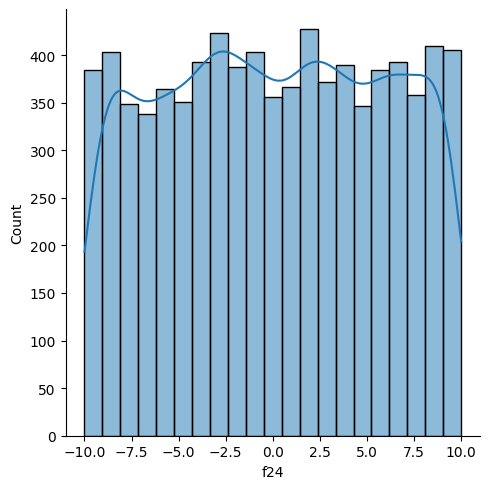

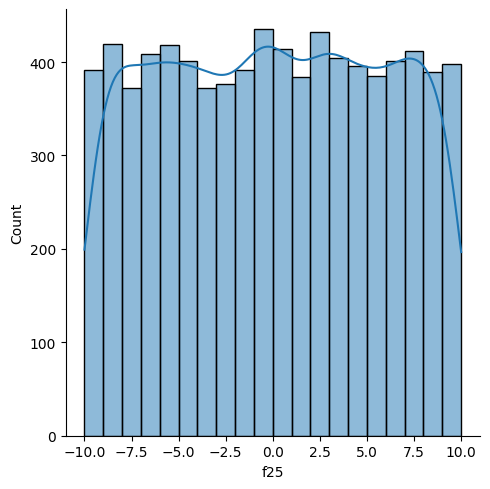

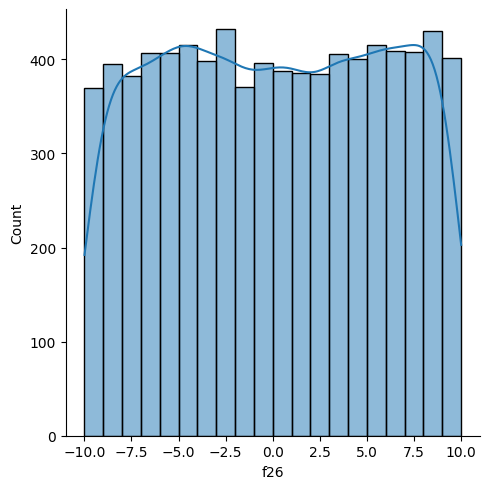

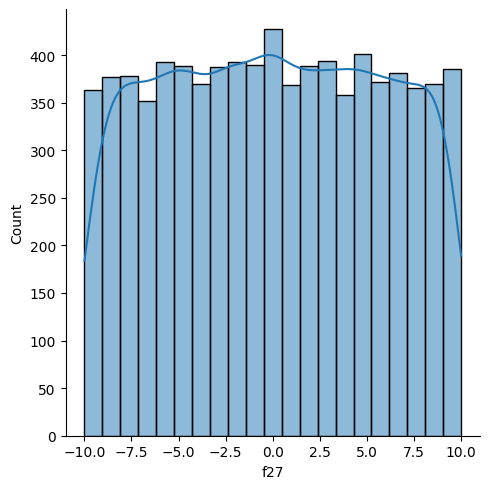

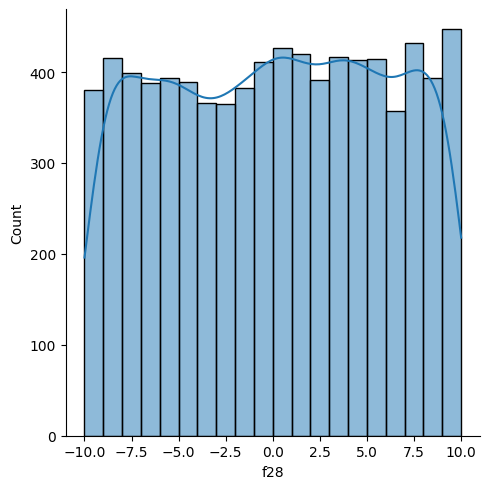

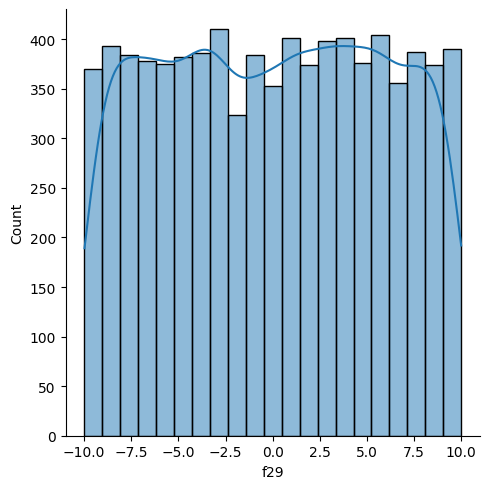

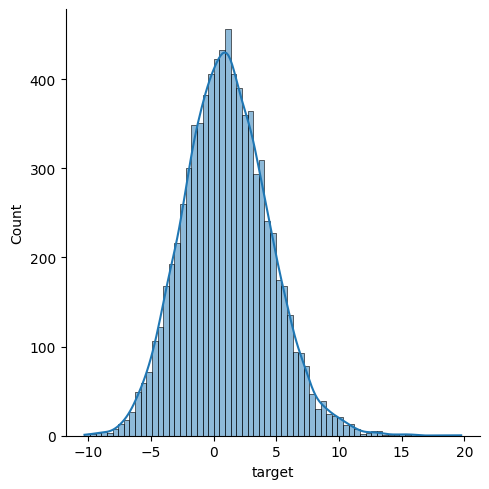

In [14]:
import seaborn as sns

x = df.columns
for col in x:
    sns.displot(data=df, x=col, kde=True)

In [9]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

In [ ]:
reg = xgb.XGBRegressor(
    tree_method="hist",
    eval_metric=mean_absolute_error,
)

In [10]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error
def evaluate(model, X_test, y_test, name):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    mape_score = mean_absolute_percentage_error(y_test, preds)
    print(f" Model: {name}")
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape_score:.4f}")
    print(f"R2: {r2:.4f}")


In [20]:
from sklearn.ensemble import RandomForestRegressor


xgb_reg = xgb.XGBRegressor(
    tree_method="hist",
    eval_metric="mae",  
    random_state=42,
    learning_rate=0.04
)
xgb_reg.fit(X_train, y_train)
evaluate(xgb_reg, X_test, y_test, "XGBoost")


ctb_reg = ctb.CatBoostRegressor(
    iterations=1000,
    verbose=0,
    random_state=42,
    learning_rate=0.01
)
ctb_reg.fit(X_train, y_train)
evaluate(ctb_reg, X_test, y_test, "CatBoost")


lgb_reg = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.01,
    random_state=42,
    verbose=-1
)
lgb_reg.fit(X_train, y_train)
evaluate(lgb_reg, X_test, y_test, "LightGBM")

 Model: XGBoost
MAE : 0.8249
RMSE: 1.0473
MAPE: 1.1889
R2: 0.8972
 Model: CatBoost
MAE : 0.7920
RMSE: 0.9968
MAPE: 1.2257
R2: 0.9069
 Model: LightGBM
MAE : 0.8144
RMSE: 1.0300
MAPE: 1.1781
R2: 0.9006


In [96]:
importances = lgb_reg.feature_importances_
print("Feature Importances (MDI):", importances)

Feature Importances (MDI): [ 748  189  101 3615  158 1185  142  179  111  123 2432  141 3202  845
   90   70    0  143   95  180  173  129   87  124  117  129  132  102
   92  166]


In [95]:
importances = ctb_reg.feature_importances_
print("Feature Importances (MDI):", importances)

Feature Importances (MDI): [8.98305779e+00 5.04026040e-01 6.81992702e-02 1.60077255e+01
 1.70845222e-01 2.21069250e+00 4.63988953e-02 4.55819924e-02
 4.25624723e-02 3.18628295e-02 3.53120828e+01 7.50959694e-02
 3.39793571e+01 1.79840514e+00 3.70247684e-02 2.84097376e-02
 3.33471888e-02 4.07711391e-02 3.39237450e-02 1.14003084e-01
 5.48304358e-02 5.59973805e-02 3.68397643e-02 4.50414661e-02
 4.07800120e-02 4.56198687e-02 3.89392770e-02 3.13054316e-02
 3.25441034e-02 5.47291358e-02]


In [94]:
importances = xgb_reg.feature_importances_
print("Feature Importances (MDI):", importances)

Feature Importances (MDI): [0.03756778 0.00399209 0.00354765 0.06543274 0.00752817 0.02420325
 0.00574527 0.00373303 0.00401711 0.00410821 0.50041056 0.00559225
 0.23510738 0.02953464 0.00500989 0.00418125 0.         0.00515229
 0.00367934 0.00519632 0.00488749 0.00451583 0.00403588 0.00405215
 0.00395031 0.0045281  0.00513256 0.00481195 0.00482786 0.00551867]


In [59]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_mean = np.full_like(y_test, y_train.mean(), dtype=float)
mae = mean_absolute_error(y_test, y_pred_mean)
rmse = root_mean_squared_error(y_test, y_pred_mean)
r2 = r2_score(y_test, y_pred_mean)
mape_score = mean_absolute_percentage_error(y_test, y_pred_mean)
print(f"Baseline (Mean) -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}, MAPE: {mape_score:.4f}")


Baseline (Mean) -> MAE: 2.6030, RMSE: 3.2668, R²: -0.0001, MAPE: 2.0937


In [ ]:
# So our model is way above this baseline, as you can see 

# Ensemble

In [11]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
estimators = [
    ("xgb", xgb.XGBRegressor(
    tree_method="hist",
    eval_metric="mae",  
    random_state=42,
    learning_rate=0.04
)),
    ("lgb", lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.01,
    random_state=42,
    verbose=-1
)),
    ("ctb", ctb.CatBoostRegressor(
    iterations=1000,
    verbose=0,
    random_state=42,
    learning_rate=0.01
))
]

# Stacking ensemble
stack = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(),  # meta-learner
    n_jobs=-1
)

stack.fit(X_train, y_train)
ensemble_pred = stack.predict(X_test)


In [12]:
evaluate(stack, X_test, y_test, "Stacking")

 Model: Stacking
MAE : 0.8036
RMSE: 1.0033
MAPE: 0.9861
R2: 0.9026


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [500, 1000, 1500],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 1.5, 2]
}

rand_search = RandomizedSearchCV(xgb_reg, param_dist, n_iter=20, scoring="neg_mean_absolute_error", cv=3, n_jobs=-1, random_state=42)
rand_search.fit(X_train, y_train)

print("Best params:", rand_search.best_params_)


In [16]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_test = df_test.drop('target', axis=1)
y_test = df_test['target']
X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(X_test, y_test, test_size=.1, random_state=42)

In [17]:
stack.fit(X_train_test, y_train_test)
ensemble_pred = stack.predict(X_test_test)
evaluate(stack, X_test_test, y_test_test, "Stacking")

 Model: Stacking
MAE : 0.7665
RMSE: 0.9941
MAPE: 1.2063
R2: 0.8971


In [21]:
lgb_reg.fit(X_train_test, y_train_test)
ensemble_pred = stack.predict(X_test_test)
evaluate(stack, X_test_test, y_test_test, "Stacking")

 Model: Stacking
MAE : 0.7665
RMSE: 0.9941
MAPE: 1.2063
R2: 0.8971


In [98]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_mean_test = np.full_like(y_test_test, y_train_test.mean(), dtype=float)
mae = mean_absolute_error(y_test_test, y_pred_mean_test)
rmse = root_mean_squared_error(y_test_test, y_pred_mean_test)
r2 = r2_score(y_test_test, y_pred_mean_test)
mape_score = mean_absolute_percentage_error(y_test_test, y_pred_mean_test)
print(f"Baseline (Mean) -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, MAPE: {mape_score:.4f}")


Baseline (Mean) -> MAE: 2.4642, RMSE: 3.1024, R2: -0.0026, MAPE: 1.9454
